In [ ]:
%tensorflow_version 2.x
import tensorflow as tf 
print(tf.__version__)

!pip install transformers 

2.2.0-rc3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
import numpy as np
import time
import datetime
from tqdm import tqdm
from transformers import (TFBertForSequenceClassification,
                          TFDistilBertForSequenceClassification,
                          TFAlbertForSequenceClassification,
                          AlbertTokenizer,
                          DistilBertTokenizer, 
                          BertTokenizer,
                          BertConfig,
                          AlbertConfig,
                          DistilBertConfig                      
                          )


In [ ]:

dataset = 'AG'

if dataset == 'IMDB':
  num_labels = 2
  data = pd.read_csv('/content/drive/My Drive/datasets/IMDB Dataset.csv').sample(frac=1).reset_index(drop=True)
elif dataset == 'AG':
  num_labels = 4
  data = pd.read_csv('/content/drive/My Drive/datasets/ag_news_csv/train.csv', header=None).sample(frac=1).reset_index(drop=True)
  temp = pd.read_csv('/content/drive/My Drive/datasets/ag_news_csv/test.csv', header = None).sample(frac=1).reset_index(drop=True)
  data = pd.concat([data, temp]).sample(frac=1).reset_index(drop=True)

print(data.shape)

data.head()

(127600, 3)


,0,1,2
0,3,Tokyo Stocks Bounce Up at Opening,TOKYO (Reuters) - Tokyo's key Nikkei average ...
1,3,Treasuries Dip But Selling Momentum Slows (Reu...,Reuters - U.S. Treasury debt was down a sliver...
2,2,Defending champions avoid second lost,Defending champions Detroit Pistons avoided se...
3,3,Durable Goods Orders Up,Orders for durable goods rose in September for...
4,2,Venus gets off to positive start,"Venus Williams, fighting to qualify for the se..."


In [ ]:
label_encoder = preprocessing.LabelEncoder()

if dataset == 'IMDB':
  data['sentiment'] = label_encoder.fit_transform(data['sentiment'])
  print(data['sentiment'].value_counts())
elif dataset == 'AG':
  data[0] = label_encoder.fit_transform(data[0])
  print(data[0].value_counts())

print(data.head())

if dataset == 'IMDB': 
  x = (np.array(data['review']))
  y = (np.array(data['sentiment']))
elif dataset == 'AG':
  x = (np.array(data[2]))
  y = (np.array(data[0]))

 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)
 
print("Train dataset shape: {0}, \nTest dataset shape: {1}, \nValidation dataset shape: {2}"
      .format(x_train.shape, x_test.shape, x_val.shape))

3    31900
2    31900
1    31900
0    31900
Name: 0, dtype: int64
   0  ...                                                  2
0  2  ...   TOKYO (Reuters) - Tokyo's key Nikkei average ...
1  2  ...  Reuters - U.S. Treasury debt was down a sliver...
2  1  ...  Defending champions Detroit Pistons avoided se...
3  2  ...  Orders for durable goods rose in September for...
4  1  ...  Venus Williams, fighting to qualify for the se...

[5 rows x 3 columns]
Train dataset shape: (76560,), 
Test dataset shape: (25520,), 
Validation dataset shape: (25520,)


In [ ]:
model = 'base'

if model == 'base':
  config = BertConfig.from_pretrained("bert-base-uncased", num_labels=num_labels)
  bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", config = config)
  bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

elif model == 'distil':
  config = DistilBertConfig.from_pretrained("distilbert-base-cased", num_labels=num_labels)
  bert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', config = config)
  bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

elif model == 'albert':
  config = AlbertConfig.from_pretrained("albert-base-v2", num_labels=num_labels)
  bert_model = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2', config = config)
  bert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')


In [ ]:
config

BertConfig {
  "_num_labels": 2,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": null,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": null,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "length_penalty": 1.0,
  "max_length": 20,
  "max_position_embeddings": 512,
  "min_length": 0,
  "model_type": "bert",
  "no_repeat_ngram_size": 0,
  "num_attention_heads": 12,
  "num_beams": 1,
  "num_hidden_layers": 12,
  "num_return_sequences": 1,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pad_token_id": 0,
  "pr

In [ ]:
max_length=128

def convert_to_input(reviews, max_length):
    input_ids,attention_masks,token_type_ids = [], [], []
  
    for x in tqdm(reviews,position=0, leave=True):
      
        
        inputs = bert_tokenizer.encode_plus(x, add_special_tokens=True, max_length=max_length,
                                              pad_to_max_length = True, return_attention_mask = True, return_token_type_ids = True)
        
        input_ids.append(inputs['input_ids'])
        attention_masks.append(inputs['attention_mask'])
        token_type_ids.append(inputs['token_type_ids'])
  
    return [np.asarray(input_ids),
            np.asarray(attention_masks),
            np.asarray(token_type_ids)]

x_train_input= convert_to_input(x_train, max_length)
x_val_input = convert_to_input(x_val, max_length)
x_test_input = convert_to_input(x_test, max_length)


100%|██████████| 10000/10000 [00:13<00:00, 735.40it/s]


In [ ]:
def example_to_features(input_ids,attention_masks,token_type_ids,y):
    return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids},y

train_ds = tf.data.Dataset.from_tensor_slices((x_train_input[0],
                                               x_train_input[1],
                                               x_train_input[2],
                                               y_train)).map(example_to_features).batch(16)

val_ds = tf.data.Dataset.from_tensor_slices((x_val_input[0],
                                               x_val_input[1],
                                               x_val_input[2],
                                               y_val)).map(example_to_features).batch(16)

test_ds = tf.data.Dataset.from_tensor_slices((x_test_input[0],
                                               x_test_input[1],
                                               x_test_input[2],
                                               y_test)).map(example_to_features).batch(16)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')


bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

bert_model.summary()

Model: "tf_albert_for_sequence_classification_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
albert (TFAlbertMainLayer)   multiple                  11683584  
_________________________________________________________________
dropout_163 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 11,685,122
Trainable params: 11,685,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:

bert_history = bert_model.fit(
    train_ds,
    epochs=1,
    validation_data = val_ds
)

In [ ]:
name = 'bert' + model + '_' + dataset + '_' + str(max_length)
cp_path = '/content/drive/My Drive/datasets/sys843/'

bert_model.save_weights(cp_path + name)

In [ ]:
# Plot training & validation accuracy values
plt.plot(bert_history.history['accuracy'])
plt.plot(bert_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(bert_history.history['loss'])
plt.plot(bert_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = bert_model.evaluate(test_ds, verbose = 1) 

1595/1595 [==============================] - 280s 176ms/step - loss: 0.1686 - accuracy: 0.9427


In [ ]:
### analysis of a model

In [ ]:
# loading model

ml = 256

name = 'bert' + model + '_' + dataset + '_' + str(ml)
cp_path = '/content/drive/My Drive/datasets/sys843/'

bert_model.load_weights(cp_path + name)

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')


bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

bert_model.summary()

Model: "tf_bert_for_sequence_classification_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_239 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# create dataset

def convert_to_input_analysis(reviews, max_length):
    input_ids,attention_masks,token_type_ids = [], [], []
    lengths = []
  
    for x in tqdm(reviews,position=0, leave=True):
      
        
        inputs = bert_tokenizer.encode_plus(x, add_special_tokens=True, max_length=max_length,
                                              pad_to_max_length = True, return_attention_mask = True, return_token_type_ids = True)
        
        input_ids.append(inputs['input_ids'])
        attention_masks.append(inputs['attention_mask'])
        token_type_ids.append(inputs['token_type_ids'])

        
        lengths.append(sum(inputs['attention_mask']))
  
    return {"input_ids": np.asarray(input_ids),
          "attention_mask": np.asarray(attention_masks),
          "token_type_ids": np.asarray(token_type_ids)}, np.array(lengths)


x_test_analysis, x_length_analysis = convert_to_input_analysis(x_test, 512) #512 est le max de BERT

100%|██████████| 10000/10000 [00:35<00:00, 285.54it/s]


In [ ]:
sum(x_length_analysis==0)

0

In [ ]:
pred_proba = bert_model.predict(x_test_analysis, verbose = 1)
pred_labels = pred_proba[0].argmax(axis=-1)



313/313 [==============================] - 207s 660ms/step


In [ ]:
results = [[0 for x in range(2)] for y in range(513)]  #index of the list if the length of the sequence

for i in range(0,len(x_length_analysis)):

  results[x_length_analysis[i]][1] = results[x_length_analysis[i]][1] + 1
  
  if pred_labels[i]==y_test[i]:
    results[x_length_analysis[i]][0] = results[x_length_analysis[i]][0] + 1


In [ ]:
# plot acc depending on the sample's length (no samples implies no dot)

acc = []
real_length = []

for i in range(0,513):
  if results[i][1]!=0:
    acc.append(results[i][0]/results[i][1])
    real_length.append(i)

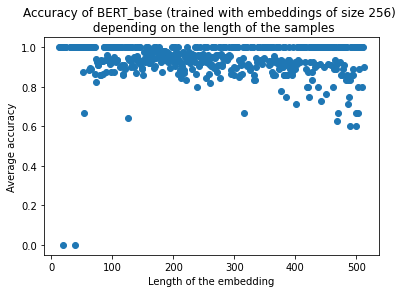

In [ ]:
plt.scatter(real_length, acc)
plt.title('Accuracy of BERT_base (trained with embeddings of size 256) \n depending on the length of the samples' )
plt.xlabel("Length of the embedding")
plt.ylabel("Average accuracy")
plt.show()

In [ ]:
# plot acc depending on length of samples, but aggregate every 64 of length



acc = []
real_length = []

begin = 0

for i in np.linspace(0,513,9, dtype = 'int32')[1:]:
  temp_acc = 0
  temp_num_samples = 0 

  for j in range(begin,i):
    temp_acc = temp_acc + results[j][0]
    temp_num_samples = temp_num_samples + results[j][1]

  if temp_num_samples!=0:
    acc.append(temp_acc/temp_num_samples)
  else:
    acc.append(0)

  real_length.append(str(begin)+'-'+str(i))

  begin = i


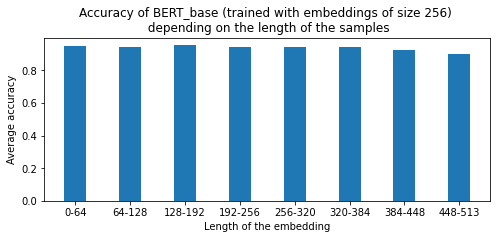

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(real_length,acc, width=0.4)
plt.title('Accuracy of BERT_base (trained with embeddings of size 256) \n depending on the length of the samples' )
plt.xlabel("Length of the embedding")
plt.ylabel("Average accuracy")
plt.show()

In [ ]:
dataset = 'AG News'

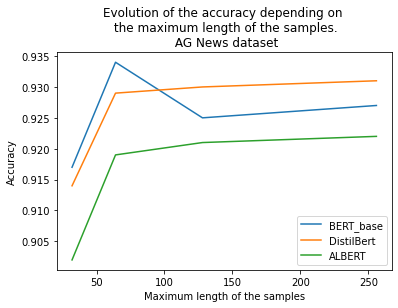

In [ ]:
### plot acc of each model depending on max_length
### The scores in the arrays are those obtained by testing the models for each different length

if dataset == 'IMDB':
  acc_base = [0.76,0.82,0.87,0.91]
  acc_distil = [0.76,0.81,0.86,0.90]
  acc_albert = [0.71,0.77,0.83,0.88]
elif dataset =='AG News':
  acc_base = [0.917,0.934,0.925,0.927]
  acc_distil = [0.914,0.929,0.930,0.931]
  acc_albert = [0.902,0.919,0.921,0.922]


ml = [32,64,128,256]

plt.plot(ml, acc_base, label = 'BERT_base')
plt.plot(ml, acc_distil, label = 'DistilBert')
plt.plot(ml, acc_albert, label = 'ALBERT')

plt.xlabel('Maximum length of the samples')
plt.ylabel('Accuracy')
plt.title('Evolution of the accuracy depending on \n the maximum length of the samples.\n '+dataset+' dataset')
plt.legend()
plt.show()


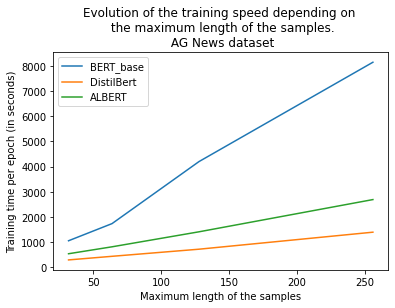

In [ ]:
### plot training speed of each model depending on max_length

if dataset == 'IMDB':
  acc_base = [590,832,1395,2520]
  acc_distil = [340,460,742,1285]
  acc_albert = [430,700,1110,1265]
elif dataset =='AG News':
  acc_base = [1060,1740,4200,8140]
  acc_distil = [300,443,725,1400]
  acc_albert = [545,820,1415,2693]

ml = [32,64,128,256]

plt.plot(ml, acc_base, label = 'BERT_base')
plt.plot(ml, acc_distil, label = 'DistilBert')
plt.plot(ml, acc_albert, label = 'ALBERT')

plt.xlabel('Maximum length of the samples')
plt.ylabel('Training time per epoch (in seconds)')
plt.title('Evolution of the training speed depending on \n the maximum length of the samples.\n '+dataset+' dataset')
plt.legend()
plt.show()


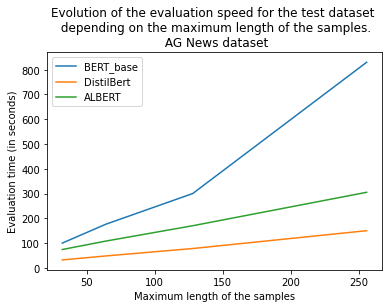

In [ ]:
### plot evaluation speed of each model depending on max_length
if dataset == 'IMDB':
  acc_base = [40,70,120,220]  #the values here are the results for each model/length
  acc_distil = [20,35,60,110]
  acc_albert = [40,75,115,130]
elif dataset =='AG News':
  acc_base = [100,176,300,830]
  acc_distil = [32,48,78,150]
  acc_albert = [74,108,170,305]

ml = [32,64,128,256]

plt.plot(ml, acc_base, label = 'BERT_base')
plt.plot(ml, acc_distil, label = 'DistilBert')
plt.plot(ml, acc_albert, label = 'ALBERT')

plt.xlabel('Maximum length of the samples')
plt.ylabel('Evaluation time (in seconds)')
plt.title('Evolution of the evaluation speed for the test dataset \n depending on the maximum length of the samples.\n '+dataset+' dataset')
plt.legend()
plt.show()
